<a href="https://colab.research.google.com/github/dzulfikarafif/TugasPython/blob/main/1101184463_Dzulfikar%20Natya%20Afif%20H_TugasPythonCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
ls

 11.docx
 1606921138650.jpg
'1_nimatul bariyah_ASTERISK2020.pdf'
 1.pdf
 1-taj-mahal-at-sunrise-michele-burgess.jpg
'23 jaya.png'
 2.gdoc
 2.pdf
'413466_tugas bindo(1).docx'
 71712-2.14.72024.txt
 91016_1600x1200-wallpaper-cb1435859407.jpg
'absen elmag.PNG'
'absen elmagtel.png'
 Classroom/
 Colab_Foto/
'Colab Notebooks'/
'Copy of key_UTS_2020.pdf'
 dataset@
'Dzulfikar Natya Afif_1101184463_148.rar'
'Dzulfikar Natya Afif H_1101184463_kel148_3.rar'
'Dzulfikar Natya Afif H_1101184463_kel148.rar'
'Dzulfikar Natya Afif H_1101184463_No1_Quiz1.pdf'
'Dzulfikar Natya Afif H_1101184463_No2_Quiz1.pdf'
'ikan lele.pptx'
 IMG_20190920_232656.jpg
 IMG_6920.MOV
'(IND) MODUL ONLINE DASTRAN 2020-2021_kk.gdoc'
'JURNAL_MODUL1-SISKOM-18080-_1101184463_DZULFIKAR NATYA AFIF H.docx'
'JURNAL_MODUL2_SISKOM-18080_1101184463_Dzulfikar Natya Afif H.pdf'
'JURNAL_MODUL3_SISKOM-18080_1101184463_Dzulfikar Natya Afif H (1).pdf'
'JURNAL_MODUL3_SISKOM-18080_1101184463_Dzulfikar Natya Afif H.gdoc'
'JURNAL_MODUL3_SISKOM-18

In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [7]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [8]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [9]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [10]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [11]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [12]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 64, 64, 3)
(352, 64, 64, 3)


In [27]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(12, activation='softmax'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_9 (Dense)              (None, 12)              

In [31]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
33/33 [==============================] - 2s 74ms/step - loss: 0.4387 - accuracy: 0.8398 - val_loss: 1.1853 - val_accuracy: 0.6222
Epoch 2/25
33/33 [==============================] - 2s 70ms/step - loss: 0.2544 - accuracy: 0.9355 - val_loss: 1.1603 - val_accuracy: 0.6648
Epoch 3/25
33/33 [==============================] - 2s 70ms/step - loss: 0.2121 - accuracy: 0.9431 - val_loss: 1.2325 - val_accuracy: 0.6250
Epoch 4/25
33/33 [==============================] - 2s 71ms/step - loss: 0.2310 - accuracy: 0.9346 - val_loss: 1.2399 - val_accuracy: 0.6278
Epoch 5/25
33/33 [==============================] - 2s 70ms/step - loss: 0.2014 - accuracy: 0.9555 - val_loss: 1.3385 - val_accuracy: 0.6108
Epoch 6/25
33/33 [==============================] - 2s 70ms/step - loss: 0.2088 - accuracy: 0.9393 - val_loss: 1.3047 - val_accuracy: 0.6080
Epoch 7/25
33/33 [==============================] - 2s 71ms/step - loss: 0.2119 - accuracy: 0.9469 - val_loss: 1.3082 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


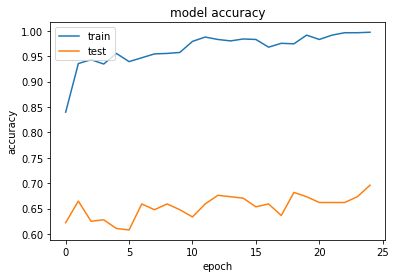

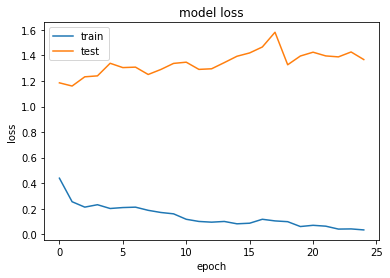

In [32]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.66      0.72      0.69        32
      GMB_02       0.53      0.67      0.59        27
      GMB_03       0.81      0.68      0.74        31
      GMB_04       0.79      0.63      0.70        30
      GMB_05       0.52      0.57      0.55        21
      GMB_06       0.66      0.66      0.66        35
      GMB_07       0.61      0.63      0.62        35
      GMB_08       0.80      0.80      0.80        25
      GMB_09       0.82      0.90      0.86        30
      GMB_10       0.75      0.69      0.72        26
      GMB_11       0.62      0.58      0.60        31
      nonGMB       0.86      0.83      0.84        29

    accuracy                           0.70       352
   macro avg       0.70      0.70      0.70       352
weighted avg       0.70      0.70      0.70       352



In [34]:
model.save('nnmodel_dataset')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_dataset/assets


In [47]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/dataset/GMB_02/IMG_20200917_134228.jpg'

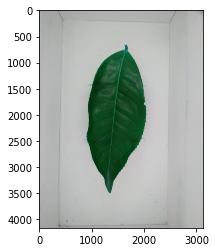

In [48]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array)

In [49]:
image_testing = Image.open('/content/drive/MyDrive/dataset/GMB_02/IMG_20200917_134228.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [50]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [51]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.08137795 0.08843671 0.07384379 0.06780501 0.09412584 0.10444225
  0.06293965 0.10841082 0.05794935 0.07457782 0.09553766 0.09055316]]
['GMB_08']
